# Histogram of SMDs per ANC

To contribute to discussions about the ideal size of ANCs, make a chart of the current distribution. 

In [1]:
import numpy as np
import pandas as pd
# import dataframe_image as dfi
from matplotlib import pyplot as plt

In [2]:
districts = pd.read_csv('../data/districts.csv')
districts = districts[districts.redistricting_year == 2022].copy()

In [3]:
anc_count = districts.groupby('anc_id').size()

In [4]:
stats = pd.DataFrame(anc_count.value_counts().sort_index(), columns=['N'])
stats['perc'] = stats['N'] / stats['N'].sum()
stats.loc[3] = 0
# stats.loc[11] = 0
stats = stats.loc[stats.index.sort_values()]
stats

,N,perc
2,1,0.021739
3,0,0.000000
4,1,0.021739
5,2,0.043478
6,5,0.108696
7,14,0.304348
8,9,0.195652
9,11,0.239130
10,3,0.065217


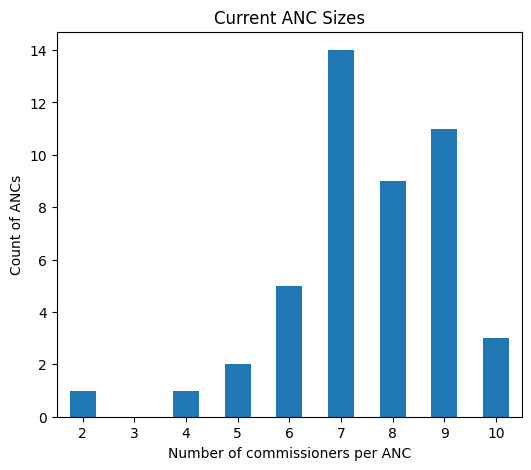

In [5]:
ax = stats['N'].plot(x=stats.index, kind='bar', figsize=(6,5))
ax.xaxis.grid(alpha=0)
plt.xticks(rotation=0)
plt.title('Current ANC Sizes')
plt.xlabel('Number of commissioners per ANC')
_ = plt.ylabel('Count of ANCs')
# plt.savefig('anc_histogram.png')

In [6]:
anc_count.min()

2

In [7]:
anc_count.median()

7.5

In [8]:
anc_count.max()

10

In [9]:
stats.N.sum()

46

## Breakout by Ward

Do different wards have odd numbers in their ANCs?

In [10]:
# Allocate the split ANCs entirely to the wards where most of their SMDs are located
districts_ward_allocated = districts.copy()

districts_ward_allocated.loc[districts_ward_allocated['smd_id'].isin([
    'smd_2022_3/4G05', 'smd_2022_3/4G06', 'smd_2022_3/4G07'
]), 'ward_id'] = 'ward_4_2022'

districts_ward_allocated.loc[districts_ward_allocated['smd_id'].isin([
    'smd_2022_8F04', 'smd_2022_8F05'
]), 'ward_id'] = 'ward_8_2022'

In [11]:
ward_anc_count = districts_ward_allocated.groupby(['ward_id', 'anc_id']).size().reset_index(name='N')

In [12]:
pivot_ward_anc = pd.pivot_table(
    data=ward_anc_count
    , index='ward_id'
    , columns='N'
    , aggfunc='size'
    , fill_value=0
)
pivot_ward_anc

N,2,4,5,6,7,8,9,10
ward_id,,,,,,,,
ward_1_2022,0,0,0,0,2,0,2,1
ward_2_2022,1,1,0,1,0,2,2,0
ward_3_2022,0,0,1,2,1,2,0,0
ward_4_2022,0,0,0,1,3,1,0,1
ward_5_2022,0,0,0,1,3,0,2,0
ward_6_2022,0,0,0,0,2,1,2,0
ward_7_2022,0,0,0,0,1,1,2,1
ward_8_2022,0,0,1,0,2,2,1,0


In [13]:
# pivot_ward_anc[4] = 0
# pivot_ward_anc[11] = 0
pivot_ward_anc = pivot_ward_anc[pivot_ward_anc.columns.sort_values()]

# pivot_ward_anc['Total'] = pivot_ward_anc.sum(axis=1)
# pivot_ward_anc.loc['Total'] = pivot_ward_anc.sum(axis=0)

pivot_ward_anc_styled = pivot_ward_anc.style.background_gradient(
    cmap='PuBu'
    , axis=None
)

# dfi.export(pivot_ward_anc_styled, 'pivot_ward_anc.png')
pivot_ward_anc_styled

N,2,4,5,6,7,8,9,10
ward_id,,,,,,,,
ward_1_2022,0,0,0,0,2,0,2,1
ward_2_2022,1,1,0,1,0,2,2,0
ward_3_2022,0,0,1,2,1,2,0,0
ward_4_2022,0,0,0,1,3,1,0,1
ward_5_2022,0,0,0,1,3,0,2,0
ward_6_2022,0,0,0,0,2,1,2,0
ward_7_2022,0,0,0,0,1,1,2,1
ward_8_2022,0,0,1,0,2,2,1,0


In [14]:
anc_count[anc_count == 10]

anc_id
anc_1A_2022    10
anc_4B_2022    10
anc_7D_2022    10
dtype: int64